In [114]:
import csv
import numpy as np

dataset=[]
#extracting the data from the csv file and storing it as a numpy list
with open("zombies_data.csv") as file:
    for i,row in enumerate(csv.reader(file)):
      if i!=0:
        dataset.append([float(x) for x in row])

dataset=np.array(dataset)
dataset=np.hstack((np.ones((dataset.shape[0],1)),dataset))
print(dataset)

X=dataset[:,:-1]
y=dataset[:,3].reshape(-1,1)
print(X)
print(y)

[[ 1.  12.   0.   0. ]
 [ 1.  14.5  1.   0. ]
 [ 1.  10.   2.   0. ]
 [ 1.  18.   0.   0. ]
 [ 1.   8.5  4.   0. ]
 [ 1.  15.   1.   0. ]
 [ 1.  22.   0.   1. ]
 [ 1.  11.   5.   1. ]
 [ 1.  13.   2.   0. ]
 [ 1.  20.5  1.   1. ]
 [ 1.  24.   2.   1. ]
 [ 1.  16.   3.   1. ]
 [ 1.  12.5  0.   0. ]
 [ 1.  28.   0.   1. ]
 [ 1.   9.   6.   1. ]
 [ 1.  25.   1.   1. ]
 [ 1.  14.   4.   1. ]
 [ 1.  19.   2.   1. ]
 [ 1.  10.5  2.   0. ]
 [ 1.  26.5  2.   1. ]
 [ 1.  15.5  5.   1. ]
 [ 1.  17.   3.   1. ]]
[[ 1.  12.   0. ]
 [ 1.  14.5  1. ]
 [ 1.  10.   2. ]
 [ 1.  18.   0. ]
 [ 1.   8.5  4. ]
 [ 1.  15.   1. ]
 [ 1.  22.   0. ]
 [ 1.  11.   5. ]
 [ 1.  13.   2. ]
 [ 1.  20.5  1. ]
 [ 1.  24.   2. ]
 [ 1.  16.   3. ]
 [ 1.  12.5  0. ]
 [ 1.  28.   0. ]
 [ 1.   9.   6. ]
 [ 1.  25.   1. ]
 [ 1.  14.   4. ]
 [ 1.  19.   2. ]
 [ 1.  10.5  2. ]
 [ 1.  26.5  2. ]
 [ 1.  15.5  5. ]
 [ 1.  17.   3. ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]


In [115]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def hypothesis(X,theta):
  return sigmoid(X@theta)

def cost(X,y,theta):
  n=X.shape[0]
  return -(1/n)*np.sum(y*np.log(hypothesis(X,theta))+(1-y)*np.log(1-hypothesis(X,theta)))

def gradient(X,y,theta):
  n=X.shape[0]
  return (1/n)*((X.T)@(hypothesis(X,theta)-y))


In [116]:
def GD(X,y,learning_rate=0.1,epochs=10000):
    theta=np.array([0,1,1]).reshape(3,1)
    error=[]
    n=X.shape[0]

    for _ in range(epochs):
        theta=theta-learning_rate*gradient(X,y,theta)
        error.append(cost(X,y,theta))

    return theta,error

Parameters:
[-18.84421278]
[0.94270754]
[2.25713657]
Prediction for 25km/h sprint speed with 1 Ammo Clip: 1
Visualising the cost: [np.float64(2.996111914957617), np.float64(0.7386357044882648), np.float64(0.8396896396735368), np.float64(2.0516770939171773), np.float64(3.7527014632015194), np.float64(1.0764720555181482), np.float64(2.6943957343801204), np.float64(3.876491115459379), np.float64(1.1839750105846538), np.float64(2.690793212304621), np.float64(3.8872414010683025), np.float64(1.193190163006633), np.float64(2.683786669452863), np.float64(3.8970224239166043), np.float64(1.2016339314886526), np.float64(2.6756405101258123), np.float64(3.905970682807529), np.float64(1.2094072085139278), np.float64(2.6666364343234017), np.float64(3.9141733217230383), np.float64(1.2165717261823163), np.float64(2.656996794797881), np.float64(3.921702693786431), np.float64(1.2231796459996958), np.float64(2.646892395504629), np.float64(3.9286199550935543), np.float64(1.2292758364682121), np.float64(2.6

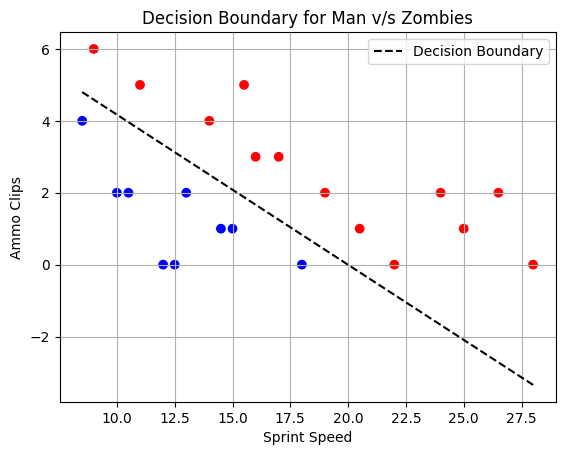

In [117]:
import matplotlib.pyplot as plt

theta,error=GD(X,y)
print("Parameters:")
print(theta[0])
print(theta[1])
print(theta[2])

y_pred=theta[0]+theta[1]*25+theta[2]*1
if y_pred>0.5:
  y_pred=1
else:
  y_pred=0

print("Prediction for 25km/h sprint speed with 1 Ammo Clip:",y_pred)
print("Visualising the cost:",error)

plt.scatter(X[:,1],X[:,2],c=y[:,0],cmap='bwr')
# decision boundary
x1=np.linspace(X[:,1].min(), X[:,1].max(),100)
x2=-(theta[0]+theta[1]*x1)/theta[2]

plt.plot(x1,x2,'k--',label="Decision Boundary")

plt.xlabel("Sprint Speed")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary for Man v/s Zombies")
plt.legend()
plt.grid()
plt.show()

